In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from transformers import CLIPVisionModel

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [3]:
finetuned_model = CLIPVisionModel.from_pretrained(
    "tanganke/clip-vit-base-patch32_fashion_mnist"
)
pretrained_model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")

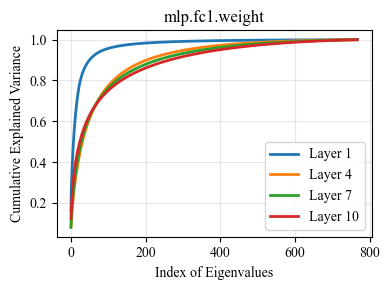

In [55]:
CEV_dict = {}

for layer_index in range(0, len(finetuned_model.vision_model.encoder.layers), 3):
    dW = (
        finetuned_model.vision_model.encoder.layers[layer_index].mlp.fc1.weight
        - pretrained_model.vision_model.encoder.layers[layer_index].mlp.fc1.weight
    )
    dW = dW.detach().clone()

    # calculate the cummulative explained variance
    u, s, vh = torch.linalg.svd(dW, full_matrices=False)
    sum_eigenvalues = torch.sum(s**2)
    cumulative_explained_variance = torch.cumsum(s**2 / sum_eigenvalues, dim=0)
    CEV_dict[layer_index] = cumulative_explained_variance

# plot the cummulative explained variance
plt.figure(figsize=(4, 3))
for layer_index in CEV_dict.keys():
    plt.plot(CEV_dict[layer_index], linewidth=2, label=f"Layer {layer_index+1}")
plt.grid(True, alpha=0.3)
plt.title("mlp.fc1.weight")
plt.xlabel("Index of Eigenvalues")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.tight_layout()

plt.savefig(
    "clip_vit_b32-cumulative_explained_variance-mlp.fc1.weight.pdf", bbox_inches="tight"
)
plt.show()

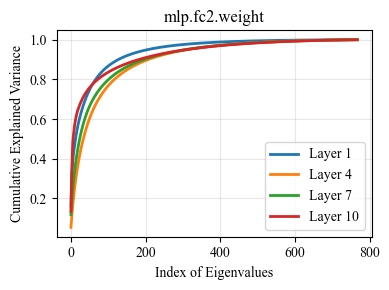

In [56]:
CEV_dict = {}

for layer_index in range(0, len(finetuned_model.vision_model.encoder.layers), 3):
    dW = (
        finetuned_model.vision_model.encoder.layers[layer_index].mlp.fc2.weight
        - pretrained_model.vision_model.encoder.layers[layer_index].mlp.fc2.weight
    )
    dW = dW.detach().clone()

    # calculate the cummulative explained variance
    u, s, vh = torch.linalg.svd(dW, full_matrices=False)
    sum_eigenvalues = torch.sum(s**2)
    cumulative_explained_variance = torch.cumsum(s**2 / sum_eigenvalues, dim=0)
    CEV_dict[layer_index] = cumulative_explained_variance

# plot the cummulative explained variance
plt.figure(figsize=(4, 3))
for layer_index in CEV_dict.keys():
    plt.plot(CEV_dict[layer_index], linewidth=2, label=f"Layer {layer_index+1}")
plt.grid(True, alpha=0.3)
plt.title("mlp.fc2.weight")
plt.xlabel("Index of Eigenvalues")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.tight_layout()

plt.savefig(
    "clip_vit_b32-cumulative_explained_variance-mlp.fc2.weight.pdf", bbox_inches="tight"
)
plt.show()